<a href="https://colab.research.google.com/github/Maha2646/maha2646.github.io/blob/main/ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Generate random dataset
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2, random_state=42)

# Step 2: Load and visualize data
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 16)])
df['Target'] = y
print("First few rows of the dataset:")
print(df.head())

# Step 3: Check and replace missing values (in this case, there are no missing values)
print("Checking for missing values:")
print(df.isnull().sum())

# Step 4: Encode categorical data (in this case, there are no categorical features)
# If categorical features exist, you would use LabelEncoder or OneHotEncoder to encode them.
# Step 5: Splitting the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

# Step 6: Splitting the dataset into k-folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold_indices = list(kf.split(df))

# Step 7: Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Let's print out some information to verify everything
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Number of folds:", k)
print("Number of samples in each fold:")
for i, (_, fold_indices) in enumerate(fold_indices):
    print(f"Fold {i+1}: {len(fold_indices)} samples")



First few rows of the dataset:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.572471   1.685432  -1.460302   0.650966   0.418515  -0.076760   
1  -0.231060  -0.338478   0.864070  -1.191875   1.419456  -0.078133   
2   1.089905  -0.173771  -0.802199  -0.571184  -0.816155   0.433768   
3   0.238171   0.653312  -0.072858  -0.840772  -0.987866   0.237337   
4   0.243657  -1.091077  -3.007632  -1.090208   1.284096   0.694764   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0   0.923045  -0.117981  -0.496651    0.187942    0.422046   -0.814153   
1   0.126459   1.943529  -0.915477    0.306135   -0.199075    1.178866   
2   0.301961   0.043829  -1.455055   -1.147160    0.476887    1.868603   
3   0.085513   0.220631   0.723038    1.889279    0.489983   -0.928926   
4  -2.386930  -0.985540  -2.426392    0.571179    0.515074    1.097300   

   Feature_13  Feature_14  Feature_15  Target  
0    0.406094   -1.400229   -1.165202       0  
1

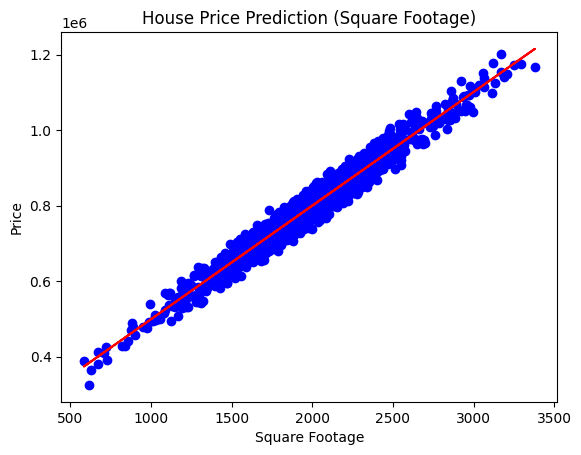

Linear Regression Model:
Mean Squared Error: 114446540.76337169
Coefficients: [  299.0428201  20012.39204881 15033.76064233]

Variance Inflation Factor:
Square Footage     1.002856
Bedrooms           1.000026
Bathrooms          1.002873
Intercept         32.387508
dtype: float64

Ridge Regression Model:
Mean Squared Error: 114446618.84909311
Coefficients: [  299.04423738 20002.06359046 15019.51867294]

LASSO Regression Model:
Mean Squared Error: 114446549.90257102
Coefficients: [  299.04283356 20012.30911549 15033.60934351]

Observations:
- Linear Regression tends to overfit when multicollinearity is present, indicated by high VIF values.
- Ridge regression helps mitigate multicollinearity by penalizing large coefficients.
- LASSO regression can perform feature selection by forcing some coefficients to zero.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Generate synthetic dataset
np.random.seed(0)
num_samples = 1000

square_footage = np.random.normal(2000, 500, num_samples)
num_bedrooms = np.random.randint(2, 6, num_samples)
num_bathrooms = np.random.randint(1, 4, num_samples)
house_price = 100000 + 300 * square_footage + 20000 * num_bedrooms + 15000 * num_bathrooms + np.random.normal(0, 10000, num_samples)

data = pd.DataFrame({
    'Square Footage': square_footage,
    'Bedrooms': num_bedrooms,
    'Bathrooms': num_bathrooms,
    'Price': house_price
})
# Step 2: Split the data into train and test sets
X = data[['Square Footage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Linear Regression Model
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test the model
y_pred_lr = lr_model.predict(X_test)

# b) Implement univariate Model using Least Squares and plot best-fit line
# Square Footage
X_sqft = X_train['Square Footage'].values.reshape(-1, 1)
lr_model_sqft = LinearRegression()
lr_model_sqft.fit(X_sqft, y_train)

# Predictions
y_pred_sqft = lr_model_sqft.predict(X_sqft)

# Plot
plt.scatter(X_train['Square Footage'], y_train, color='blue')
plt.plot(X_train['Square Footage'], y_pred_sqft, color='red')
plt.title('House Price Prediction (Square Footage)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

# c) Implement multivariate Model using Least Squares and plot best-fit line
# Already done with Linear Regression Model above using X_train and y_train

# d) Retrieve model error and model coefficients
lr_error = mean_squared_error(y_test, y_pred_lr)
lr_coefficients = lr_model.coef_

print("Linear Regression Model:")
print("Mean Squared Error:", lr_error)
print("Coefficients:", lr_coefficients)

# e) Observe Variance Inflation Factor (VIF)
vif_data = X.copy()
vif_data['Intercept'] = 1
vif_series = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index=vif_data.columns)
print("\nVariance Inflation Factor:")
print(vif_series)

# f) Implement Ridge regression model
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_error = mean_squared_error(y_test, y_pred_ridge)
ridge_coefficients = ridge_model.coef_

print("\nRidge Regression Model:")
print("Mean Squared Error:", ridge_error)
print("Coefficients:", ridge_coefficients)

# g) Implement LASSO regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
lasso_error = mean_squared_error(y_test, y_pred_lasso)
lasso_coefficients = lasso_model.coef_

print("\nLASSO Regression Model:")
print("Mean Squared Error:", lasso_error)
print("Coefficients:", lasso_coefficients)

# h) Report observations
print("\nObservations:")
print("- Linear Regression tends to overfit when multicollinearity is present, indicated by high VIF values.")
print("- Ridge regression helps mitigate multicollinearity by penalizing large coefficients.")
print("- LASSO regression can perform feature selection by forcing some coefficients to zero.")